In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df = pd.read_csv("superligaen_fouls_tutorial_06172022.csv", index_col = 0)

In [4]:
df.head()

,match_id,date,referee,variable,value,venue,team_id,team_name
0,3597749,2021-07-25 07:00:00,Aydin Uslu,fouls_for,15,H,10202,Nordsjælland
1,3597749,2021-07-25 07:00:00,Aydin Uslu,fouls_ag,14,H,10202,Nordsjælland
2,3597742,2021-07-18 07:00:00,Morten Krogh,fouls_for,12,H,10202,Nordsjælland
3,3597742,2021-07-18 07:00:00,Morten Krogh,fouls_ag,21,H,10202,Nordsjælland
4,3597744,2021-07-18 09:00:00,Mads-Kristoffer Kristoffersen,fouls_for,8,H,8391,FC København


In [27]:
df.describe()

,match_id,value,team_id
count,7.720000e+02,772.000000,772.000000
mean,3.676905e+06,10.471503,8647.733161
std,1.164541e+05,3.888253,658.252376
min,3.597741e+06,2.000000,8071.000000
25%,3.597790e+06,8.000000,8391.000000
50%,3.597840e+06,10.000000,8415.000000
75%,3.847500e+06,13.000000,8595.000000
max,3.880957e+06,25.000000,10202.000000


In [5]:
fouls_per_team  = (
    df[df["variable"] == "fouls_for"]
    .groupby("team_name")
    ["value"]
    .sum()
    .reset_index()
)

X = fouls_per_team["team_name"]
height = fouls_per_team["value"]

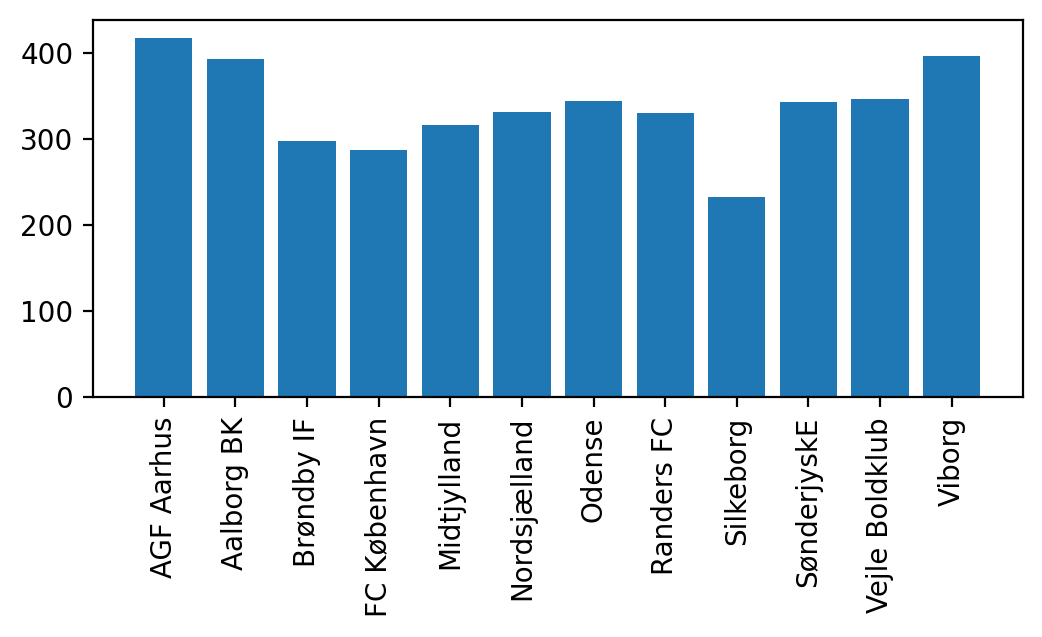

In [6]:
fig = plt.figure(figsize=(6, 2.5), dpi = 200)
ax = plt.subplot(111)

ax.bar(X, height)

# Adjust ticks
ax.tick_params(axis = "x", rotation = 90)

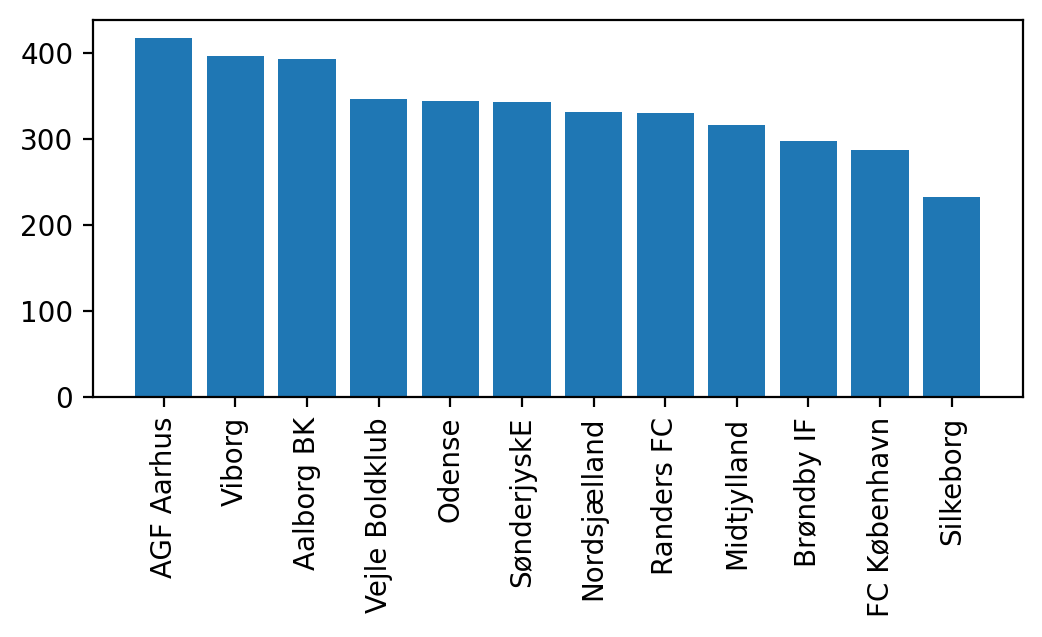

In [7]:
fouls_per_team = fouls_per_team.sort_values(by = "value", ascending = False)
X = fouls_per_team["team_name"]
height = fouls_per_team["value"]
fig = plt.figure(figsize=(6, 2.5), dpi = 200)
ax = plt.subplot(111)

ax.bar(X, height)

# Adjust ticks
ax.tick_params(axis = "x", rotation = 90)

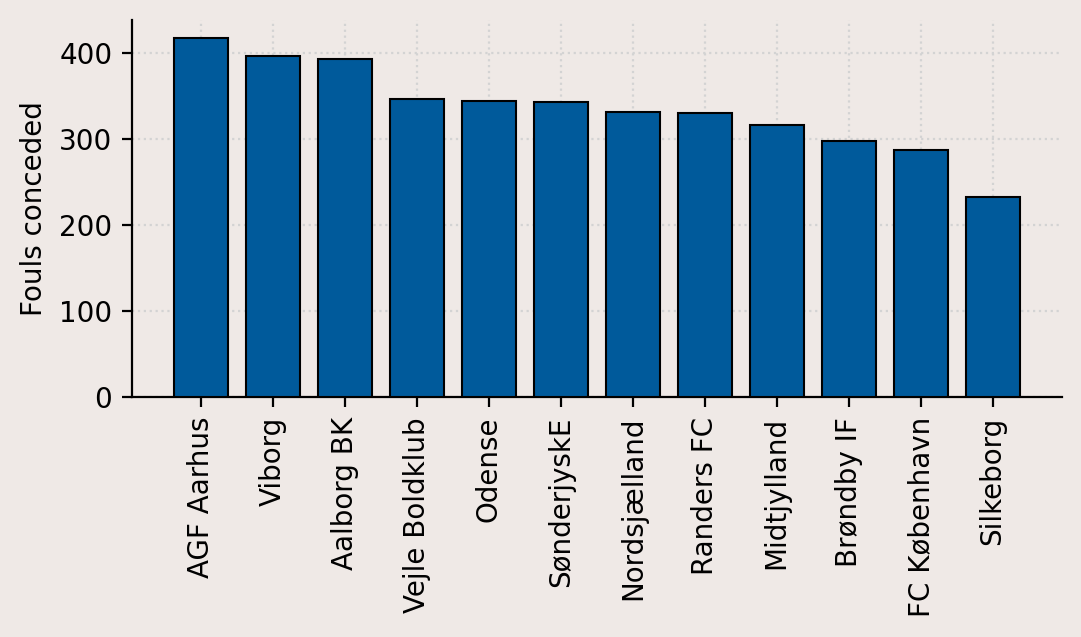

In [8]:
fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":")
ax.set_ylabel("Fouls conceded")

ax.bar(
	X, 
    height, 
    ec = "black", 
    lw = .75, 
    color = "#005a9b", 
    zorder = 3, 
    width = 0.75
)

# Adjust ticks
ax.tick_params(axis = "x", rotation = 90)

In [9]:
fouls_per_team_venue  = (
    df[df["variable"] == "fouls_for"]
    .groupby(["team_name", "venue"])
    ["value"]
    .sum()
    .reset_index()
)

# We'll sort the values using the previous
# order.
sort_order = fouls_per_team["team_name"].to_list()
fouls_per_team_venue = fouls_per_team_venue.set_index("team_name")
fouls_per_team_venue = fouls_per_team_venue.loc[sort_order]
fouls_per_team_venue.reset_index(inplace = True)


height_h = (
    fouls_per_team_venue
    [fouls_per_team_venue["venue"] == "H"]["value"]
    .reset_index(drop = True)
)

height_a = (
    fouls_per_team_venue
    [fouls_per_team_venue["venue"] == "A"]["value"]
    .reset_index(drop = True)
)

# We'll annotate the x-axis differently.
X = np.arange(len(height_h))

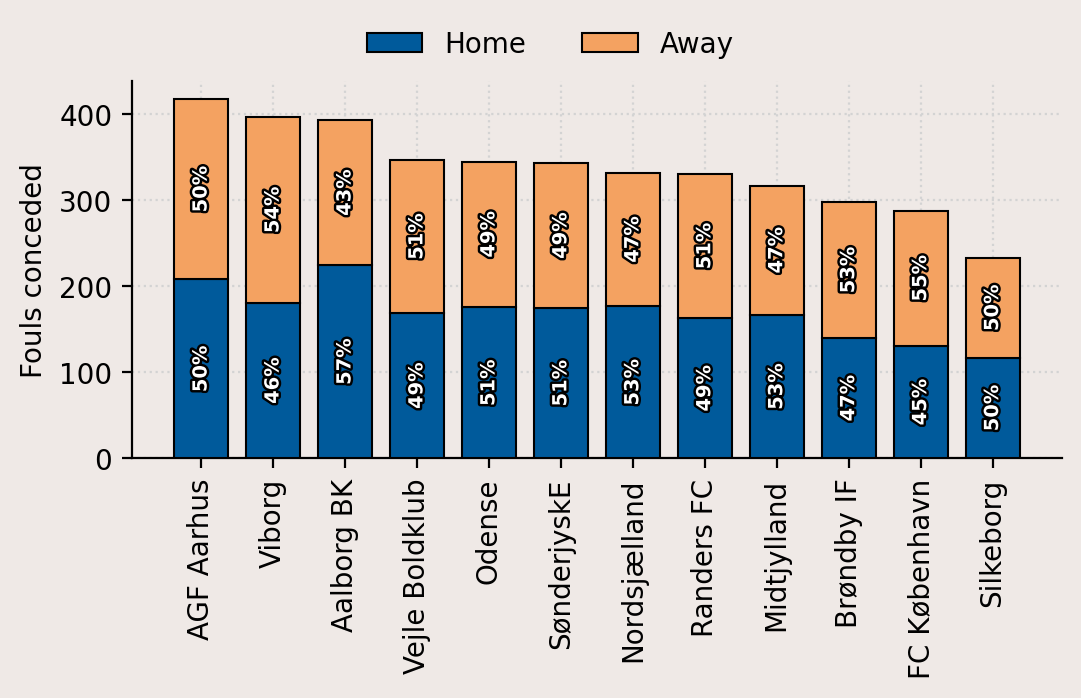

In [10]:
fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":")
ax.set_ylabel("Fouls conceded")

# Home fouls committed
ax.bar(
    X, 
    height_h, 
    ec = "black", 
    lw = .75, 
    color = "#005a9b", 
    zorder = 3, 
    width = 0.75,
    label = "Home"
)

# Away fouls committed (notice the bottom param)
ax.bar(
    X, 
    height_a,
    bottom = height_h, # This creates the stacked chart 
    ec = "black", 
    lw = .75, 
    color = "#f4a261", 
    zorder = 3, 
    width = 0.75,
    label = "Away"
)

ax.legend(
    ncol = 2, 
    loc = "upper center", 
    bbox_to_anchor = (0.45, 1.2),
    frameon = False
)

# Annotate the bar charts

aux_counter = 0
for y_h, y_a in zip(height_h, height_a):
    # annotate percentage of fouls in the center of the bar
    home_text = ax.annotate(
        xy = (aux_counter, y_h/2),
        s = f"{y_h/(y_h + y_a):.0%}", # F-strings are cool :)
        size = 7,
        ha = "center",
        va = "center",
        weight = "bold",
        color = "white",
        rotation = 90
    )

    away_text = ax.annotate(
        xy = (aux_counter, y_h + y_a/2), # Notice the sum of the bottom data.
        s = f"{y_a/(y_h + y_a):.0%}",
        size = 7,
        ha = "center",
        va = "center",
        weight = "bold",
        color = "white",
        rotation = 90
    )

    home_text.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
    )

    away_text.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
    )

    aux_counter += 1


# Adjust ticks
xticks_ = ax.xaxis.set_ticks(
    ticks = X,
    #labels = sort_order,
    #rotation = 90
)

xticks_ = ax.xaxis.set_ticklabels(
    ticklabels = sort_order,
    #labels = sort_order,
    rotation = 90
)


In [11]:
# Fouls conceded
fouls_per_team_c  = (
    df[df["variable"] == "fouls_for"]
    .groupby(["team_name"])
    ["value"]
    .sum()
    .reset_index()
)

# Fouls drawn
fouls_per_team_d  = (
    df[df["variable"] == "fouls_ag"]
    .groupby(["team_name"])
    ["value"]
    .sum()
    .reset_index()
)

# We'll use the fouls conceded as the main order.
fouls_per_team_c = fouls_per_team_c.sort_values(by = "value", ascending = False)

sort_order = fouls_per_team_c["team_name"].to_list()
fouls_per_team_d = fouls_per_team_d.set_index("team_name")
fouls_per_team_d = fouls_per_team_d.loc[sort_order]
fouls_per_team_d.reset_index(inplace = True)

# We define our series to be plotted
height_c = fouls_per_team_c["value"].reset_index(drop = True)
height_d = fouls_per_team_d["value"].reset_index(drop = True)

X = np.arange(len(height_c))

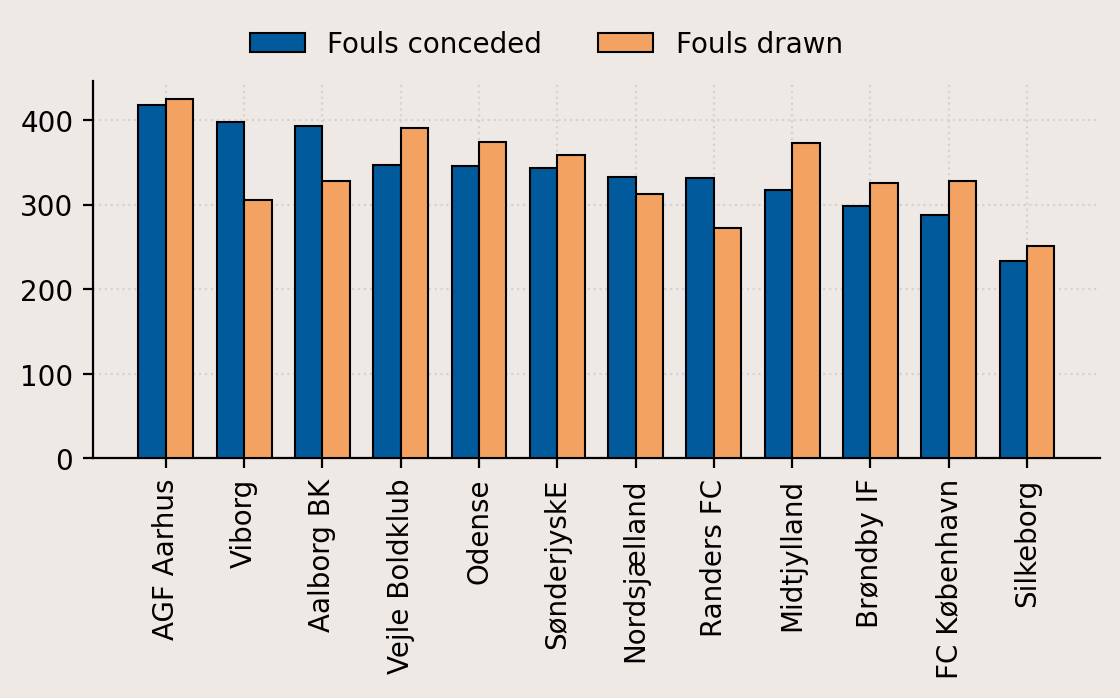

In [16]:
fig = plt.figure(figsize=(6.5, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":")


# We specify the width of the bar
width = 0.35

# Fouls conceded
ax.bar(
    X, 
    height_c, 
    ec = "black", 
    lw = .75, 
    color = "#005a9b", 
    zorder = 3, 
    width = width,
    label = "Fouls conceded"
)

ax.bar(
    X + width, 
    height_d, 
    ec = "black", 
    lw = .75, 
    color = "#f4a261", 
    zorder = 3, 
    width = width,
    label = "Fouls drawn"
)

ax.legend(
    ncol = 2, 
    loc = "upper center", 
    bbox_to_anchor = (0.45, 1.2),
    frameon = False
)

# Adjust ticks
xticks_ = ax.xaxis.set_ticks(
    ticks = X + width/2,
    #labels = sort_order,
    #rotation = 90
)

xticks_ = ax.xaxis.set_ticklabels(
    ticklabels = sort_order,
    #labels = sort_order,
    rotation = 90
)

In [13]:
ratio_df = pd.DataFrame({
    "team_name": sort_order,
    "fouls_per_team_d": height_d,
    "fouls_per_team_c": height_c
})

ratio_df["ratio"] = ratio_df["fouls_per_team_c"]/ratio_df["fouls_per_team_d"]
ratio_df = ratio_df.sort_values(by = "ratio", ascending = False)

# We define our series to be plotted
height = ratio_df["ratio"].reset_index(drop = True)

X = np.arange(len(height))

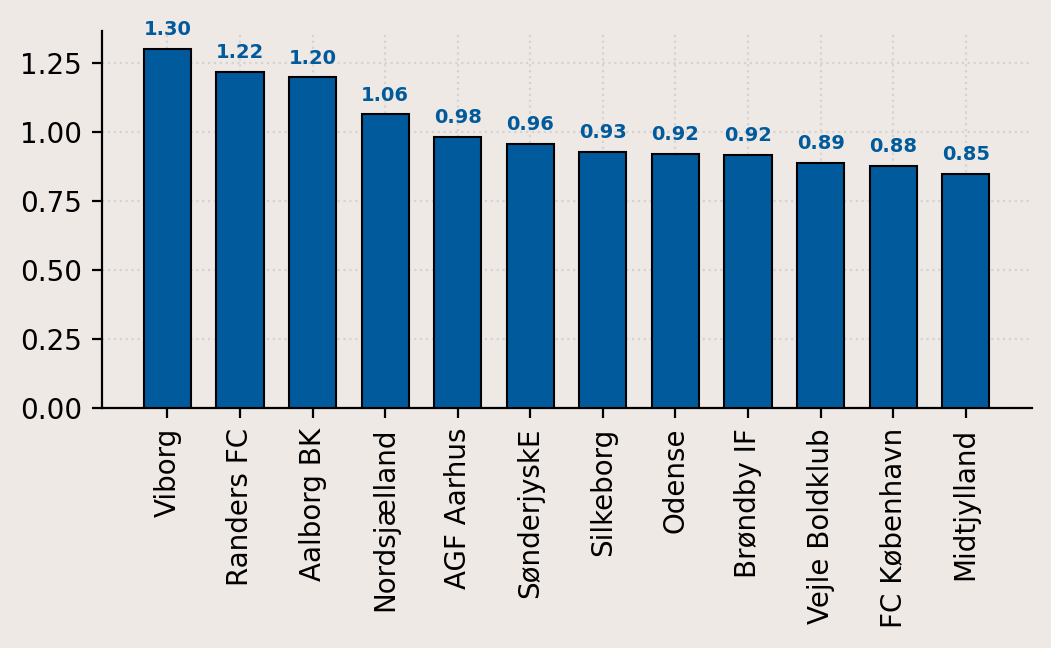

In [17]:
fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":")


# We specify the width of the bar
width = 0.65

# Fouls conceded
ax.bar(
    X, 
    height, 
    ec = "black", 
    lw = .75, 
    color = "#005a9b", 
    zorder = 3, 
    width = width,
    label = "Fouls conceded"
)

# Annotate the ratio

for index, y in enumerate(height):
    ax.annotate(
        xy = (index, y),
        s = f"{y:.2f}",
        xytext = (0, 7),
        textcoords = "offset points",
        size = 7,
        color = "#005a9b",
        ha = "center",
        va = "center",
        weight = "bold"
    )

xticks_ = ax.xaxis.set_ticks(
    ticks = X,
    #labels = ratio_df["team_name"],
    #rotation = 90
)

xticks_ = ax.xaxis.set_ticklabels(
    ticklabels = ratio_df["team_name"],
    #labels = sort_order,
    rotation = 90
)

In [15]:
!apt-get -qq install -y highlight

Selecting previously unselected package liblua5.2-0:amd64.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../liblua5.2-0_5.2.4-1.1build1_amd64.deb ...
Unpacking liblua5.2-0:amd64 (5.2.4-1.1build1) ...
Selecting previously unselected package highlight-common.
Preparing to unpack .../highlight-common_3.41-1_all.deb ...
Unpacking highlight-common (3.41-1) ...
Selecting previously unselected package highlight.
Preparing to unpack .../highlight_3.41-1_amd64.deb ...
Unpacking highlight (3.41-1) ...
Setting up liblua5.2-0:amd64 (5.2.4-1.1build1) ...
Setting up highlight-common (3.41-1) ...
Setting up highlight (3.41-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [18]:
pip install highlight-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
pip install highlight

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement highlight (from versions: none)
ERROR: No matching distribution found for highlight


In [37]:
!apt-get -qq install -y highlight_text

E: Unable to locate package highlight_text


In [38]:
!apt-get -qq install -y matplotlib

E: Unable to locate package matplotlib


In [19]:
from highlight import highlight_text

ModuleNotFoundError: ignored

In [20]:
from PIL import Image
import urllib
import matplotlib.font_manager as fm
from highlight_text import fig_text

In [21]:
# Merge to get team id's
ratio_df = pd.merge(ratio_df, df[["team_name", "team_id"]].drop_duplicates(), how = "left")

# Replace for abbreviated names.
ratio_df.replace({
    "team_name":{
        'Viborg': 'VFF',
        'Randers FC': 'RFC',
        'Aalborg BK': 'AaB',
        'Nordsjælland': 'FCN',
        'AGF Aarhus': 'AGF',
        'SønderjyskE': 'SON',
        'Silkeborg': 'SIF',
        'Odense': 'OB',
        'Brøndby IF': 'BIF',
        'Vejle Boldklub': 'VBK',
        'FC København': 'FCK',
        'Midtjylland': 'FCM'
    }
}, inplace = True)

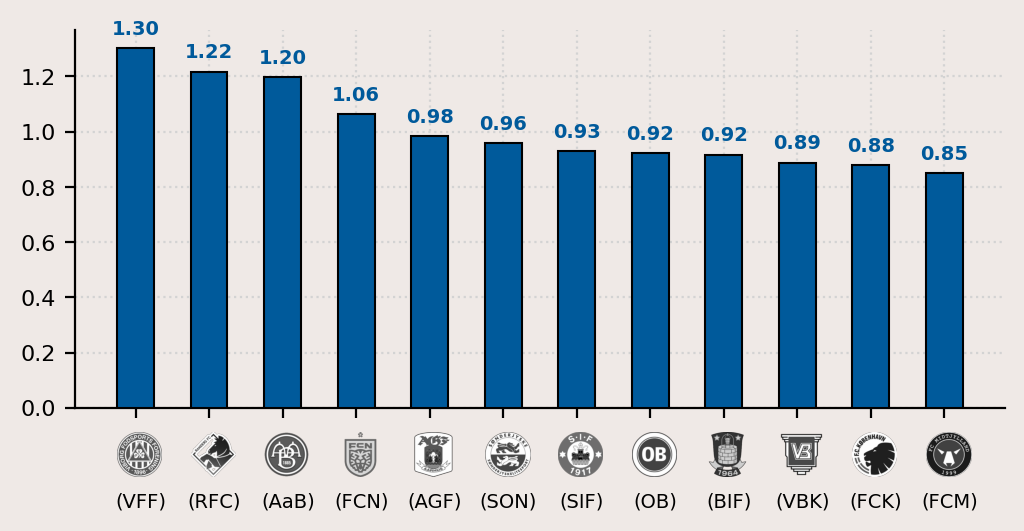

In [26]:
fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":")

# We specify the width of the bar
width = 0.5

# Fouls conceded
ax.bar(
    X, 
    height, 
    ec = "black", 
    lw = .75, 
    color = "#005a9b", 
    zorder = 3, 
    width = width,
    label = "Fouls conceded"
)

for index, y in enumerate(height):
    ax.annotate(
        xy = (index, y),
        s = f"{y:.2f}",
        xytext = (0, 7),
        textcoords = "offset points",
        size = 7,
        color = "#005a9b",
        ha = "center",
        va = "center",
        weight = "bold"
    )

xticks_ = ax.xaxis.set_ticks(
    ticks = X,
    #labels = []
)

xticks_ = ax.xaxis.set_ticklabels(
    ticklabels = [],
    #labels = sort_order,
    #rotation = 90
)

ax.tick_params(labelsize = 8)


# --- Axes transformations

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform

# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, team_id in enumerate(ratio_df["team_id"]):
    ax_coords = DC_to_NFC([index - width/2, -0.25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.09, 0.09], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")

    logo_ax.annotate(
        xy =(0, 0),
        s = f"({ratio_df['team_name'].iloc[index]})",
        xytext = (8.5, -25),
        textcoords = "offset points",
        size = 7,
        ha = "center",
        va = "center"
    )

fig_text(
    x = 0.12, y = 1.2,
    s = "Which Danish teams committed more fouls\nthan they received?",
    family = "DM Sans",
    weight = "bold",
    size = 13
)

fig_text(
    x = 0.12, y = 1,
    s = "Ratio of fouls conceded to fouls drawn for the 2021/2022 season | viz by @sonofacorner",
    family = "Karla",
    color = "grey",
    size = 8
)